In [180]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [181]:
df = pd.read_csv("../Data/Raw/adult.data",header=None)

In [182]:
df.rename(columns= {
    0: "age",
    1: "workclass",
    2: "fnlwgt",
    3: "education",
    4: "education-num",
    5: "marital-status",
    6: "occupation",
    7: "relationship",
    8: "race",
    9: "sex",
    10: "capital-gain",
    11: "capital-loss",
    12: "hours-per-week",
    13: "native-country",
    14: "income"
    
},inplace=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [184]:
df["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [185]:
df["income"][0]

' <=50K'

In [186]:
valores=[]
for x in df["income"]:
    valores.append(x.strip())

In [187]:
df["income"] = valores

In [188]:
df["income"] = np.where(df["income"]=="<=50K",0,1)

In [189]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [190]:
df["extras"] = df["capital-gain"]- df["capital-loss"]

In [191]:
df.groupby("workclass")[["extras","hours-per-week"]].mean().sort_values(by="extras",ascending=False)

,extras,hours-per-week
workclass,,
Self-emp-inc,4720.554659,48.818100
Self-emp-not-inc,1769.430146,44.421881
Private,809.209068,40.267096
Local-gov,770.348304,40.982800
Federal-gov,720.963542,41.379167
State-gov,618.442989,39.031587
?,546.035403,31.919390
Without-pay,487.857143,32.714286
Never-worked,0.000000,28.428571


In [192]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [193]:
valores=[]
for x in df["workclass"]:
    valores.append(x.strip())

In [194]:
df["workclass"]=valores

In [195]:
mapa_trabajo = {
    'State-gov': 'Gobierno estatal',
    'Self-emp-not-inc': 'Autónomo no incorporado',
    'Private': 'Sector privado',
    'Federal-gov': 'Gobierno federal',
    'Local-gov': 'Gobierno local',
    '?': 'Desconocido',
    'Self-emp-inc': 'Autónomo incorporado',
    'Without-pay': 'Sin salario',
    'Never-worked': 'Nunca ha trabajado'
}
 

df["workclass"] = df["workclass"].map(mapa_trabajo)

In [196]:
df["workclass"].value_counts()

workclass
Sector privado             22696
Autónomo no incorporado     2541
Gobierno local              2093
Desconocido                 1836
Gobierno estatal            1298
Autónomo incorporado        1116
Gobierno federal             960
Sin salario                   14
Nunca ha trabajado             7
Name: count, dtype: int64

In [197]:

mapa2 = {
    'Autónomo incorporado':6,
    'Gobierno federal':4,
    'Gobierno local':3,
    'Autónomo no incorporado':3,
    'Gobierno estatal':2,
    'Sector privado':2,
    'Desconocido':1,
    'Sin salario':0,
    'Nunca ha trabajado':0
}
 
df["puesto_ord"] = df["workclass"].map(mapa2)

In [198]:
df["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [199]:
valores=[]
for x in df["marital-status"]:
    valores.append(x.strip())

df["marital-status"]= valores

In [200]:
marit_map = {
    'Never-married': 'Nunca casado/a',
    'Married-civ-spouse': 'Casado/a (civil)',
    'Divorced': 'Divorciado/a',
    'Married-spouse-absent': 'Cónyuge ausente',
    'Separated': 'Separado/a',
    'Married-AF-spouse': 'Casado/a (Fuerzas Armadas)',
    'Widowed': 'Viudo/a'
}

df["marital-status"] = df["marital-status"].map(marit_map)

In [201]:
df = pd.get_dummies(df,columns= ["marital-status"])

In [202]:
df["race"].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [203]:
df = pd.get_dummies(df,columns=["race"])

In [204]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [205]:
valores=[]
for x in df["occupation"]:
    valores.append(x.strip())

df["occupation"]= valores

In [206]:
occupation_map = {
    'Adm-clerical': 'Administrativo / Oficina',
    'Exec-managerial': 'Ejecutivo / Gerencial',
    'Handlers-cleaners': 'Manipuladores / Limpiadores',
    'Prof-specialty': 'Profesional / Especialista',
    'Other-service': 'Otros servicios',
    'Sales': 'Ventas',
    'Craft-repair': 'Oficios / Reparaciones',
    'Transport-moving': 'Transporte / Movimiento',
    'Farming-fishing': 'Agricultura / Pesca',
    'Machine-op-inspct': 'Operador / Inspector de máquinas',
    'Tech-support': 'Soporte técnico',
    '?': 'Desconocido / No especificado',
    'Protective-serv': 'Servicios de protección / Seguridad',
    'Armed-Forces': 'Fuerzas armadas',
    'Priv-house-serv': 'Servicio doméstico'
}

df["occupation"]= df["occupation"].map(occupation_map)

In [207]:
df["occupation"].unique()

array(['Administrativo / Oficina', 'Ejecutivo / Gerencial',
       'Manipuladores / Limpiadores', 'Profesional / Especialista',
       'Otros servicios', 'Ventas', 'Oficios / Reparaciones',
       'Transporte / Movimiento', 'Agricultura / Pesca',
       'Operador / Inspector de máquinas', 'Soporte técnico',
       'Desconocido / No especificado',
       'Servicios de protección / Seguridad', 'Fuerzas armadas',
       'Servicio doméstico'], dtype=object)

In [208]:
df.groupby("occupation")[["capital-gain","hours-per-week"]].mean().sort_values(by="capital-gain",ascending=False)

,capital-gain,hours-per-week
occupation,,
Profesional / Especialista,2726.699517,42.386715
Ejecutivo / Gerencial,2262.772996,44.987703
Ventas,1319.829315,40.781096
Servicios de protección / Seguridad,708.098613,42.870570
Soporte técnico,673.552802,39.432112
Oficios / Reparaciones,649.512808,42.304221
Desconocido / No especificado,604.491047,31.906131
Agricultura / Pesca,589.726358,46.989940
Administrativo / Oficina,495.954907,37.558355


In [209]:
oc_map = {
    "Ejecutivo / Gerencial":5,
    "Profesional / Especialista":4,
    "Ventas":3,
    "Servicios de protección / Seguridad":3,
    "Soporte técnico":3,
    "Oficios / Reparaciones":2,
    "Transporte / Movimiento":2,
    "Desconocido / No especificado":1,
    "Agricultura / Pesca":1,
    "Administrativo / Oficina":1,
    "Operador / Inspector de máquinas":1,
    "Fuerzas armadas":1,
    "Servicio doméstico":0,
    "Manipuladores / Limpiadores":0,
    "Otros servicios":0,
    
}


df["occ_ord"] = df["occupation"].map(oc_map)

In [210]:
df= pd.get_dummies(df,columns=["sex"])

In [211]:
df["education-num"].value_counts()

education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [212]:
df["educacion_superior"] = np.where(df["education-num"]>=13,1,0)

In [213]:
df["educacion_inferior"] = np.where(df["education-num"]<=9,1,0)

In [214]:
df["edad_ajustada"] = df["age"]*df["education-num"]

In [215]:
df["horas_puesto"] = df["hours-per-week"] * df["occ_ord"]

In [216]:
df["edu_oc"] = df["education-num"] * df["puesto_ord"]

In [217]:
df["rango_edad"] = pd.cut(df["age"], bins=[0, 25, 35, 45, 55, 65,100], labels=False)


In [218]:
df["horas_ord"] = pd.cut(df["hours-per-week"], bins=[0, 25, 40, 60], labels=["Jornada_corta", "Jornada_media", "Jornada_larga"])
df = pd.get_dummies(df, columns=["horas_ord"])

In [219]:
df["age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [220]:
df["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [221]:
pais_a_continente = {
    "United-States": "América del Norte",
    "Cuba": "América del Norte",
    "Jamaica": "América del Norte",
    "India": "Asia",
    "?": "Desconocido",
    "Mexico": "América del Norte",
    "South": "Desconocido",
    "Puerto-Rico": "América del Norte",
    "Honduras": "América del Norte",
    "England": "Europa",
    "Canada": "América del Norte",
    "Germany": "Europa",
    "Iran": "Asia",
    "Philippines": "Asia",
    "Italy": "Europa",
    "Poland": "Europa",
    "Columbia": "América del Sur",  
    "Cambodia": "Asia",
    "Thailand": "Asia",
    "Ecuador": "América del Sur",
    "Laos": "Asia",
    "Taiwan": "Asia",
    "Haiti": "América del Norte",
    "Portugal": "Europa",
    "Dominican-Republic": "América del Norte",
    "El-Salvador": "América del Norte",
    "France": "Europa",
    "Guatemala": "América del Norte",
    "China": "Asia",
    "Japan": "Asia",
    "Yugoslavia": "Europa",
    "Peru": "América del Sur",
    "Outlying-US(Guam-USVI-etc)": "Oceanía",
    "Scotland": "Europa",
    "Trinadad&Tobago": "América del Norte",  
    "Greece": "Europa",
    "Nicaragua": "América del Norte",
    "Vietnam": "Asia",
    "Hong": "Asia",  
    "Ireland": "Europa",
    "Hungary": "Europa",
    "Holand-Netherlands": "Europa" 
}

df["continente"] = df["native-country"].map(pais_a_continente)


In [222]:
df = pd.get_dummies(df,columns=["continente"])

In [223]:
df["native-country"] = df["native-country"].str.strip()

In [224]:
df["Extranjero"] = np.where(df["native-country"]=='United-States',0,1)

In [225]:
df.groupby("native-country")["income"].mean().sort_values(ascending=False)

native-country
Iran                          0.418605
France                        0.413793
India                         0.400000
Taiwan                        0.392157
Japan                         0.387097
Yugoslavia                    0.375000
Cambodia                      0.368421
Italy                         0.342466
England                       0.333333
Canada                        0.322314
Germany                       0.321168
Philippines                   0.308081
Hong                          0.300000
Greece                        0.275862
China                         0.266667
Cuba                          0.263158
?                             0.250429
Scotland                      0.250000
United-States                 0.245835
Hungary                       0.230769
Ireland                       0.208333
South                         0.200000
Poland                        0.200000
Thailand                      0.166667
Ecuador                       0.142857
Jamaica   

In [226]:
variables = ['age', 'capital-gain', 'capital-loss',
       'hours-per-week', 'extras', 'edad_ajustada']

In [227]:
df[['age', 'capital-gain', 'capital-loss',
       'hours-per-week', 'extras', 'edad_ajustada']].dtypes

age               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
extras            int64
edad_ajustada     int64
dtype: object

In [228]:
df['age'] = np.log1p(df['age'])

In [229]:
df['capital-gain'] = np.log1p(df['capital-gain'])
df['capital-loss'] = np.log1p(df['capital-loss'])
df['hours-per-week'] = np.log1p(df['hours-per-week'])
df['edad_ajustada'] = np.log1p(df['edad_ajustada'])


In [230]:
df["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [231]:
df["relationship"] = df["relationship"].str.strip()

In [232]:
mapa_r = {
    'Husband':6,
    'Wife':5,
    'Unmarried':4,
    'Own-child':3,
    'Not-in-family': 2,
    'Other-relative':1
}

df["rel_ord"] = df["relationship"].map(mapa_r)

<Axes: >

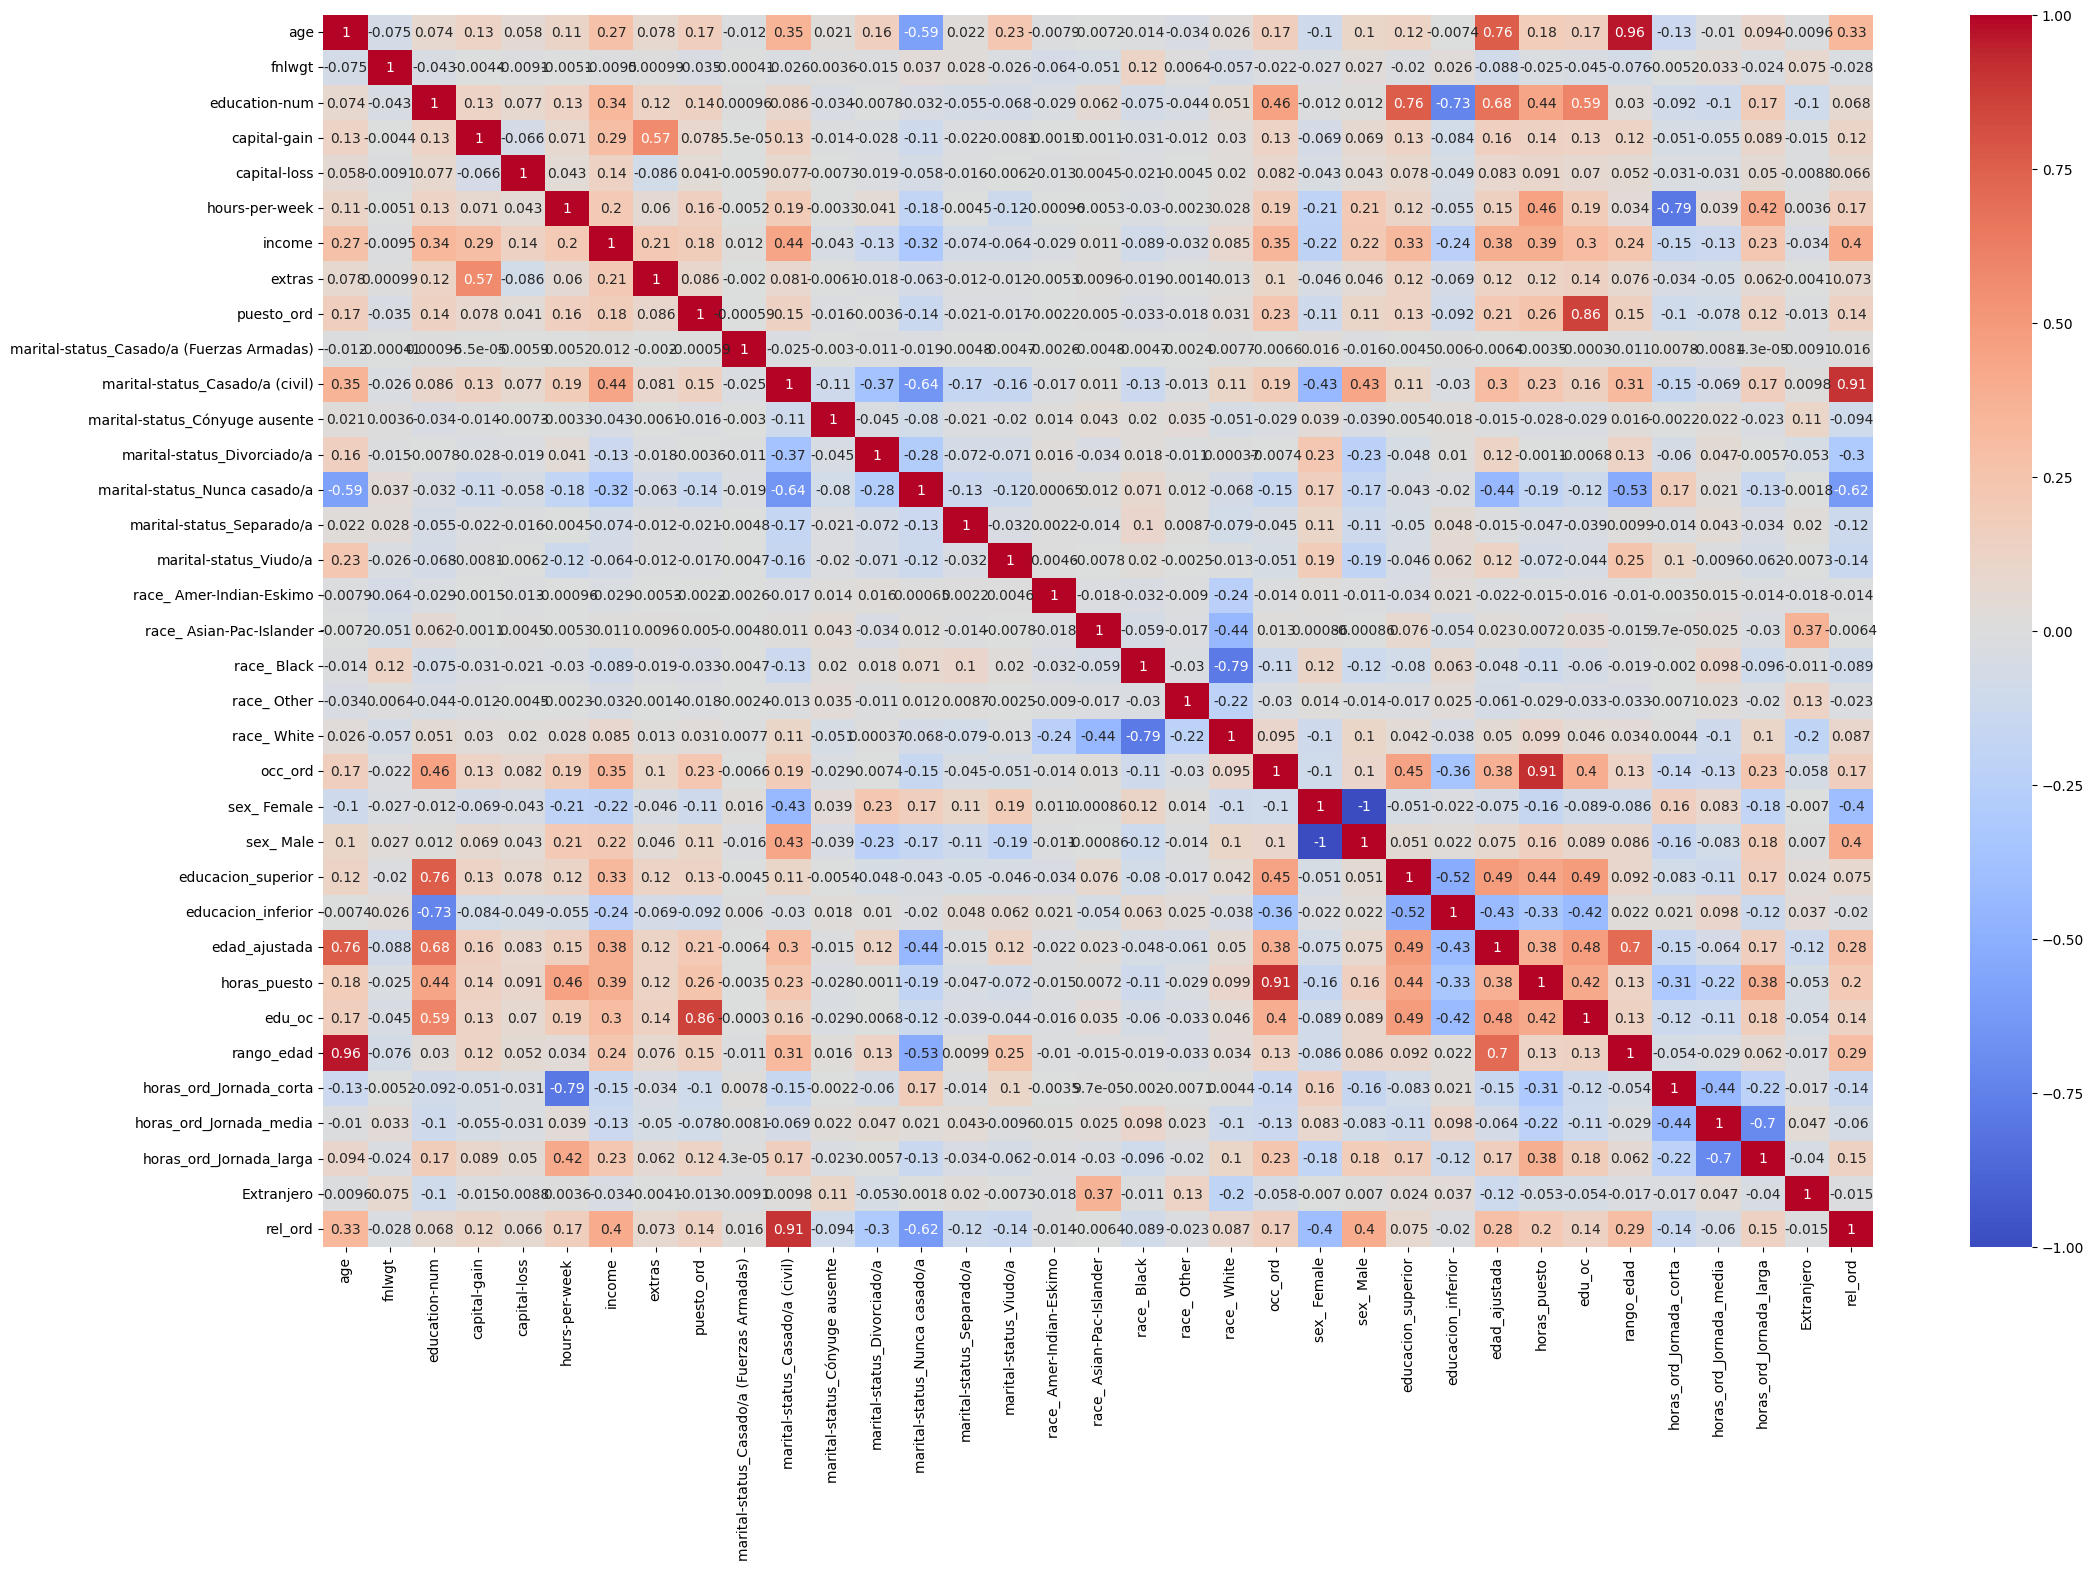

In [234]:
plt.figure(figsize=(25,16))
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,cmap="coolwarm")

In [238]:
X = df.drop(columns=["income","native-country","relationship","occupation","education","workclass"])
y = df["income"]

Prueba con regresion Logistica para ver cuantos clusters y cuantas variables funcionan mejor 

In [325]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression

In [243]:
pipe = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('feat',SelectKBest(score_func=f_classif)),
    ('mod',KMeans(n_clusters=5)),
    ('clf', LogisticRegression(max_iter=10000))
])
params = {
    'scaler':[StandardScaler(),'passthrough'],
    'feat__k':[3,5,8,10,15,20,'all'],
    'mod__n_clusters':[3,4,5,7,10],
    'clf__C':[0.1,0.5,1]
}

gs = GridSearchCV(estimator=pipe,param_grid=params,verbose=2,cv=10,scoring='accuracy')
gs.fit(X,y)
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits
[CV] END clf__C=0.1, feat__k=3, mod__n_clusters=3, scaler=StandardScaler(); total time=   0.1s
[CV] END clf__C=0.1, feat__k=3, mod__n_clusters=3, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.1, feat__k=3, mod__n_clusters=3, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.1, feat__k=3, mod__n_clusters=3, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.1, feat__k=3, mod__n_clusters=3, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.1, feat__k=3, mod__n_clusters=3, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.1, feat__k=3, mod__n_clusters=3, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.1, feat__k=3, mod__n_clusters=3, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.1, feat__k=3, mod__n_clusters=3, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.1, feat__k=3, mod__n_clusters=3, scaler=StandardScaler(); tota

Los mejores resultados a priori seran con 10  clusters y 20 variables

In [244]:
mod = gs.best_estimator_
mod.named_steps['mod']

KMeans(n_clusters=10)

Columnas utilizadas para Kmeans

In [246]:
X.columns[mod.named_steps["feat"].get_support()]

Index(['age', 'education-num', 'capital-gain', 'hours-per-week', 'extras',
       'puesto_ord', 'marital-status_Casado/a (civil)',
       'marital-status_Nunca casado/a', 'occ_ord', 'sex_ Female', 'sex_ Male',
       'educacion_superior', 'educacion_inferior', 'edad_ajustada',
       'horas_puesto', 'edu_oc', 'rango_edad', 'horas_ord_Jornada_corta',
       'horas_ord_Jornada_larga', 'rel_ord'],
      dtype='object')

Hago el clustering que servirá como variable predictora de mi modelo

In [360]:

X = df[[ 'age', 'education-num',
       'puesto_ord', 'marital-status_Casado/a (civil)', 'occ_ord', 'sex_ Female', 'sex_ Male', 'edad_ajustada', 'edu_oc', 'rel_ord']]
  

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

km = KMeans(n_clusters=3,random_state=42)
km.fit(X_scal)

KMeans(n_clusters=3, random_state=42)

In [361]:
clusters = km.labels_
df["cluster"] = clusters

Ya tengo nueva columna con los clusters 

Ahora balancearé mi variable target

In [322]:
df["income"].value_counts(normalize=True)

income
0    0.75919
1    0.24081
Name: proportion, dtype: float64

In [324]:
from imblearn.over_sampling import SMOTE

In [335]:
X = df.drop(columns=["income","native-country","relationship","occupation","education","workclass"])
y = df["income"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [338]:
generador = SMOTE(sampling_strategy='auto', random_state=42) 
X_trainR, y_trainR = generador.fit_resample(X_train, y_train)


In [339]:
y_trainR.value_counts(normalize=True)

income
1    0.5
0    0.5
Name: proportion, dtype: float64

In [ ]:
df_train = pd.concat((X_trainR,y_trainR),axis=1)

In [345]:
df_train.to_csv('../Data/Train/Train.csv')

In [344]:
df_test = pd.concat((X_test,y_test),axis= 1)

In [346]:
df_test.to_csv('../Data/Test/Test.csv')

In [348]:
df_entero = pd.concat((df_train,df_test),axis=0)

In [350]:
df_entero.to_csv('../Data/Processed/Datos.csv')

In [356]:
df_entero.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'extras', 'puesto_ord',
       'marital-status_Casado/a (Fuerzas Armadas)',
       'marital-status_Casado/a (civil)', 'marital-status_Cónyuge ausente',
       'marital-status_Divorciado/a', 'marital-status_Nunca casado/a',
       'marital-status_Separado/a', 'marital-status_Viudo/a',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'occ_ord', 'sex_ Female', 'sex_ Male',
       'educacion_superior', 'educacion_inferior', 'edad_ajustada',
       'horas_puesto', 'edu_oc', 'rango_edad', 'horas_ord_Jornada_corta',
       'horas_ord_Jornada_media', 'horas_ord_Jornada_larga', 'Extranjero',
       'rel_ord', 'cluster', 'income'],
      dtype='object')